# Import Libraries

In [54]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools
import cv2

# Loading Data

In [55]:
data = np.load('ORL_faces.npz')

In [56]:
type(data)

numpy.lib.npyio.NpzFile

In [57]:
sorted(data.files)

['testX', 'testY', 'trainX', 'trainY']

In [58]:
x_train = data['trainX']
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

y_train= data['trainY']
y_test= data['testY']

print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

# Reshape The Data

In [59]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

In [60]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (160,)


# Visualize The Faces

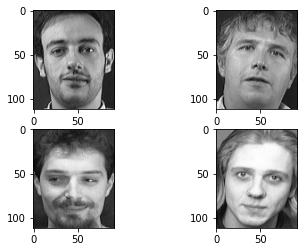

In [61]:
delta = 5
n = np.random.randint(low=0,high=x_train.shape[0]- 2*delta,dtype=int)

plt.gray()
plt.subplot(2,2,1)
plt.imshow(x_train[n])
plt.subplot(2,2,2)
plt.imshow(x_train[n+delta])
plt.subplot(2,2,3)
plt.imshow(x_train[n-delta])
plt.subplot(2,2,4)
plt.imshow(x_train[n+delta*2])
plt.show()

In [62]:
y_train[0]

12

In [63]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard

# CNN Model

In [64]:
cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')  
])

In [65]:
cnn_model.compile(
   optimizer="Adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]
)

In [66]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 53, 43, 36)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 24624)             0         
                                                                 
 dense_8 (Dense)             (None, 2024)             

In [67]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=100, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/100
1/1 - 3s - loss: 3.0033 - accuracy: 0.0658 - val_loss: 3.1807 - val_accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 2s - loss: 3.3052 - accuracy: 0.0746 - val_loss: 3.0193 - val_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 3/100
1/1 - 2s - loss: 3.0592 - accuracy: 0.0570 - val_loss: 2.9951 - val_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 4/100
1/1 - 2s - loss: 2.9996 - accuracy: 0.0702 - val_loss: 3.0103 - val_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 5/100
1/1 - 2s - loss: 2.9775 - accuracy: 0.0877 - val_loss: 3.0228 - val_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 6/100
1/1 - 2s - loss: 2.9827 - accuracy: 0.0965 - val_loss: 3.0146 - val_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 7/100
1/1 - 2s - loss: 2.9703 - accuracy: 0.0877 - val_loss: 2.9971 - val_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 8/100
1/1 - 2s - loss: 2.9327 - accuracy: 0.1272 - val_loss: 2.9824 - val_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 9/100
1/1 - 2s - l

Epoch 69/100
1/1 - 2s - loss: 0.0072 - accuracy: 1.0000 - val_loss: 1.6565e-04 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 70/100
1/1 - 2s - loss: 0.0148 - accuracy: 0.9912 - val_loss: 2.2430e-04 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 71/100
1/1 - 2s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.0603e-04 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 72/100
1/1 - 2s - loss: 0.0093 - accuracy: 0.9956 - val_loss: 3.5775e-04 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 73/100
1/1 - 2s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.9050e-04 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 74/100
1/1 - 2s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 4.1821e-04 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 75/100
1/1 - 2s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 4.4368e-04 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 76/100
1/1 - 2s - loss: 0.0085 - accuracy: 0.9956 - val_loss: 4.0001e-04 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 77/100
1/1

In [68]:
score = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test loss {:.4f}'.format(score[0]))
print('test accuracy {:.4f}'.format(score[1]))

test loss 0.4722
test accuracy 0.9438


In [69]:
result=cnn_model.predict(x_test)
res=np.argmax(result,axis=1)
res

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  8,
        4, 17,  4,  8,  4, 17,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  7,  9,  9,  9,  7, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15,  0, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 10, 18, 18, 18, 10, 18, 19,
       19, 19, 19, 19, 19, 19, 19], dtype=int64)

In [70]:
accuracy_score(res,y_test)

0.94375

# Model Score Plot

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


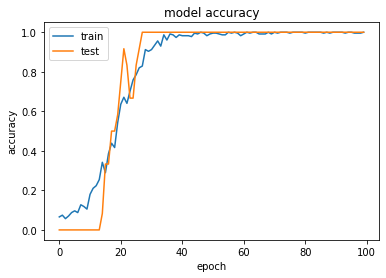

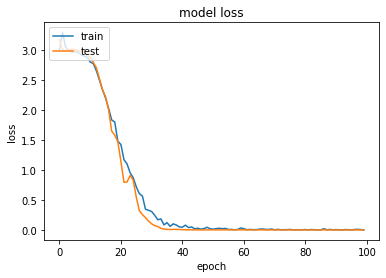

In [71]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Confusion Matrix

Confusion matrix
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
Confusion matrix


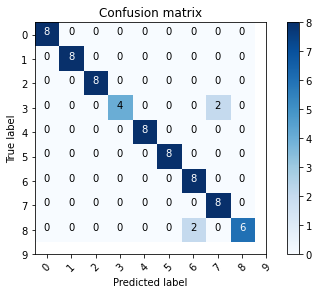

In [73]:
cnf_matrix=confusion_matrix(np.array(y_test), res)

y_test1 = np_utils.to_categorical(y_test, 20)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('Confusion matrix')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

print('Confusion matrix')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix')